# Notebook 3: Sentiment Labeling with VADER

This notebook applies VADER sentiment analysis to label tweets.

## Steps:
1. Load cleaned dataset
2. Apply VADER sentiment analysis
3. Categorize sentiment (Positive/Neutral/Negative)
4. Analyze sentiment distribution
5. Explore sentiment by features
6. Save labeled dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to Python path for proper module imports
project_root = os.path.dirname(os.getcwd())  # Go up one level from notebooks/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src import utils, preprocessing, feature_engineering, models

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Cleaned Dataset

In [2]:
# Load cleaned dataset
data_path = utils.get_processed_data_path('tweets_cleaned.csv')
df = pd.read_csv(data_path)

print(f"\n{'='*60}")
print(f"DATASET LOADED")
print(f"{'='*60}")
print(f"Total tweets: {len(df)}")
print(f"{'='*60}\n")


DATASET LOADED
Total tweets: 330



## 2. Apply VADER Sentiment Analysis

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment score
def get_vader_sentiment(text):
    """
    Get VADER sentiment scores for a given text.
    
    Returns:
        dict: Dictionary containing neg, neu, pos, and compound scores
    """
    if not isinstance(text, str):
        text = str(text)
    return analyzer.polarity_scores(text)

# Apply VADER to all tweets
print("Applying VADER sentiment analysis...")
vader_scores = df['Tweet Content'].apply(get_vader_sentiment)

# Extract individual scores
df['vader_neg'] = vader_scores.apply(lambda x: x['neg'])
df['vader_neu'] = vader_scores.apply(lambda x: x['neu'])
df['vader_pos'] = vader_scores.apply(lambda x: x['pos'])
df['vader_compound'] = vader_scores.apply(lambda x: x['compound'])

print("✓ VADER sentiment scores calculated")
print(f"\nSample scores:")
print(df[['Tweet Content', 'vader_compound']].head(10))

Applying VADER sentiment analysis...
✓ VADER sentiment scores calculated

Sample scores:
                                                                                                                                           Tweet Content  \
0                                                                                                   We tried to stop it from overthinking.\n\nWe failed.   
1                                         I predicted this\nThey need some one they can control without him battling and eye.\nThey need a 'yes sir' man   
2                            Well, hope this new coach meets the expectation of the board and fans. Big coaches tend to turn down the chelsea job offer.   
3  Chelsea always sign coaches for 6 and half years before they'll fire them a year later after disastrous campaign. I pray he managed to see till De...   
4                                                                                                I give him till the next internati

## 3. Categorize Sentiment

In [4]:
# Define sentiment categories based on compound score
# Thresholds (commonly used in literature):
# - compound >= 0.05: Positive
# - compound <= -0.05: Negative
# - -0.05 < compound < 0.05: Neutral

def categorize_sentiment(compound_score):
    """
    Categorize sentiment based on VADER compound score.
    """
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['sentiment'] = df['vader_compound'].apply(categorize_sentiment)

print("✓ Sentiment categorized")
print(f"\nSentiment distribution:")
print(df['sentiment'].value_counts().to_string())

✓ Sentiment categorized

Sentiment distribution:
sentiment
Positive    151
Neutral     131
Negative     48


## 4. Analyze Sentiment Distribution

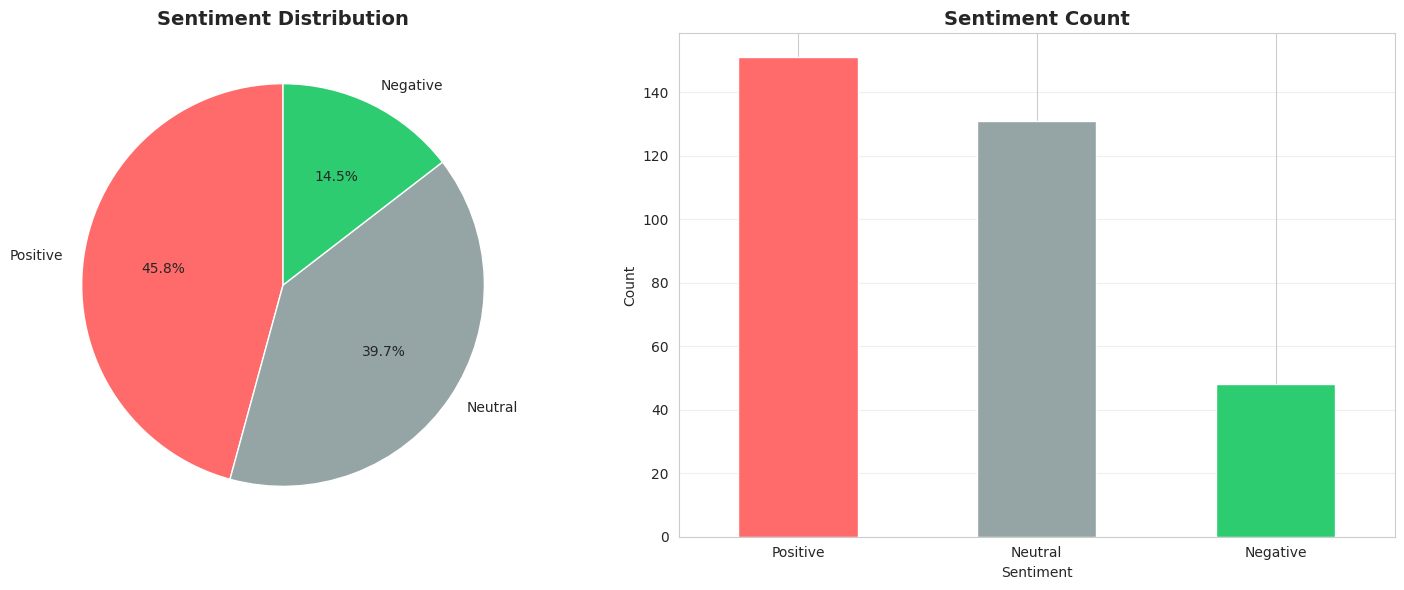

✓ Sentiment distribution plot saved


In [5]:
# Sentiment distribution pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
sentiment_counts = df['sentiment'].value_counts()
colors = ['#ff6b6b', '#95a5a6', '#2ecc71']  # Red, Gray, Green
sentiment_counts.plot(kind='pie', ax=ax1, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# Bar chart
sentiment_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Sentiment Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
ax2.set_xticklabels(sentiment_counts.index, rotation=0)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/sentiment_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Sentiment distribution plot saved")

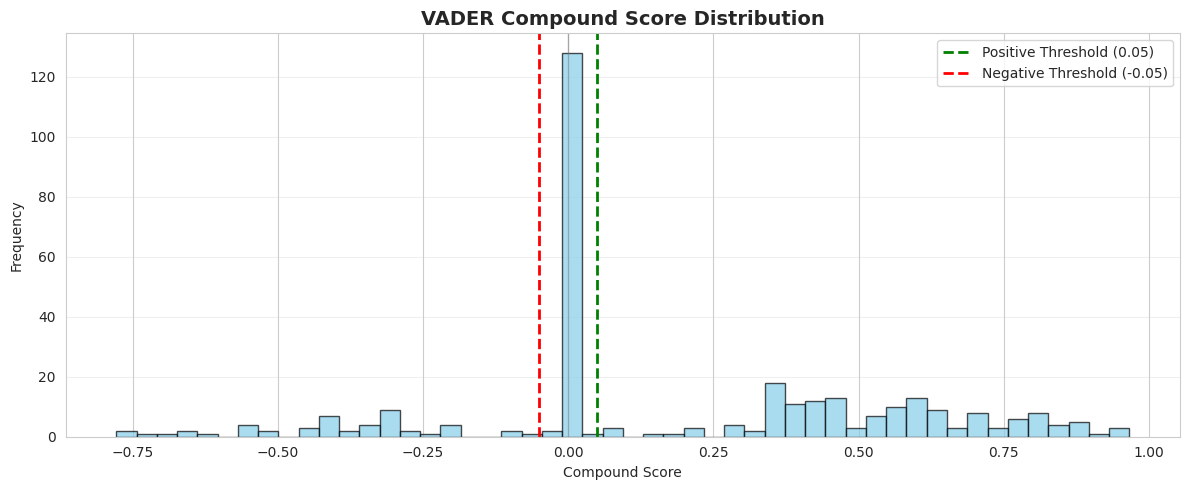

✓ Compound score distribution plot saved


In [6]:
# Compound score distribution
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram
ax.hist(df['vader_compound'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(x=0.05, color='green', linestyle='--', linewidth=2, label='Positive Threshold (0.05)')
ax.axvline(x=-0.05, color='red', linestyle='--', linewidth=2, label='Negative Threshold (-0.05)')
ax.axvline(x=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)

ax.set_title('VADER Compound Score Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Compound Score')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/compound_score_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Compound score distribution plot saved")

## 5. Explore Sentiment by Features

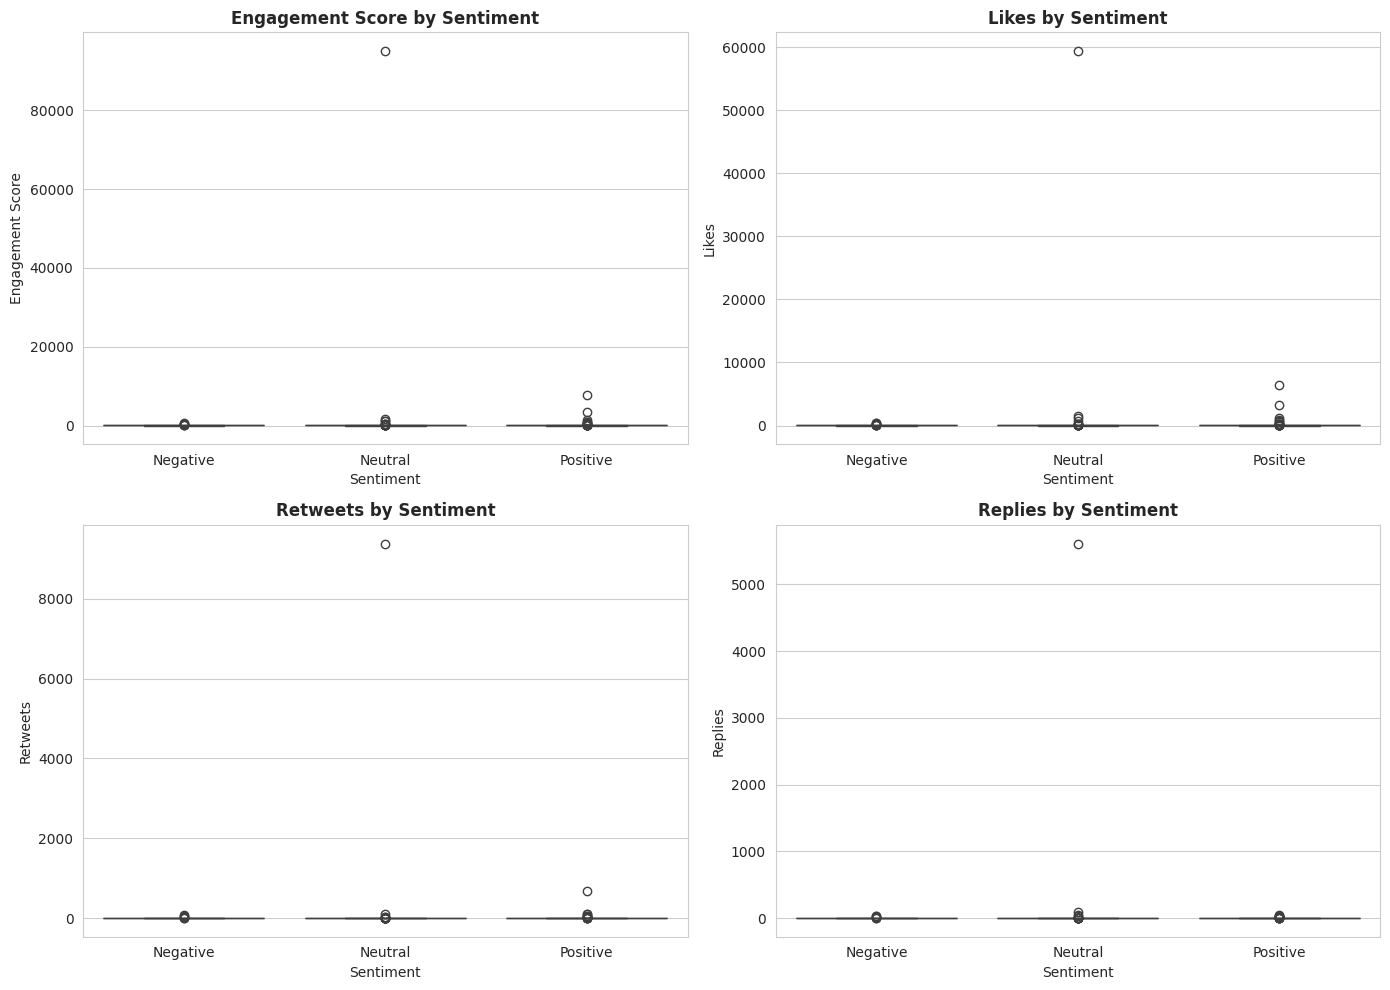

✓ Sentiment by engagement plot saved


In [7]:
# Sentiment by engagement
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Engagement score
sns.boxplot(x='sentiment', y='engagement_score', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[0, 0])
axes[0, 0].set_title('Engagement Score by Sentiment', fontweight='bold')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Engagement Score')

# Likes
sns.boxplot(x='sentiment', y='Likes', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[0, 1])
axes[0, 1].set_title('Likes by Sentiment', fontweight='bold')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Likes')

# Retweets
sns.boxplot(x='sentiment', y='Retweets', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[1, 0])
axes[1, 0].set_title('Retweets by Sentiment', fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Retweets')

# Replies
sns.boxplot(x='sentiment', y='Replies', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[1, 1])
axes[1, 1].set_title('Replies by Sentiment', fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Replies')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/sentiment_by_engagement.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Sentiment by engagement plot saved")

## 6. Sample Tweets by Sentiment

In [8]:
# Display sample tweets for each sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    print(f"\n{'='*60}")
    print(f"SAMPLE {sentiment.upper()} TWEETS")
    print(f"{'='*60}")
    
    sentiment_df = df[df['sentiment'] == sentiment]
    
    for idx, row in sentiment_df.head(5).iterrows():
        print(f"\n[{row['sentiment']}] Compound: {row['vader_compound']:.3f}")
        print(f"Tweet: {row['Tweet Content'][:150]}...")
        if 'engagement_score' in df.columns:
            print(f"Engagement: {row['engagement_score']}")
    print()



SAMPLE POSITIVE TWEETS

[Positive] Compound: 0.544
Tweet: I predicted this
They need some one they can control without him battling and eye.
They need a 'yes sir' man...
Engagement: 1

[Positive] Compound: 0.612
Tweet: Well, hope this new coach meets the expectation of the board and fans. Big coaches tend to turn down the chelsea job offer....
Engagement: 0

[Positive] Compound: 0.226
Tweet: Win-win cooperation, surprises....
Engagement: 1

[Positive] Compound: 0.361
Tweet: 6 years & half contract like they won’t sack him before 2027...
Engagement: 3

[Positive] Compound: 0.670
Tweet: Six and a half years at Chelsea? bold. very bold. see you in november....
Engagement: 3


SAMPLE NEUTRAL TWEETS

[Neutral] Compound: 0.000
Tweet: I give him till the next international break, march max...
Engagement: 1

[Neutral] Compound: 0.000
Tweet: What's the probability of him being sacked before june on a scale of 1-10? 
@grok...
Engagement: 3

[Neutral] Compound: 0.000
Tweet: This one will not las

## 7. Save Labeled Dataset

In [9]:
# Save labeled dataset
output_path = utils.get_processed_data_path('tweets_labeled.csv')
df.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print(f"✓ Labeled dataset saved to: {output_path}")
print(f"  - Total tweets: {len(df)}")
print(f"  - Columns: {list(df.columns)}")
print(f"{'='*60}\n")


✓ Labeled dataset saved to: /home/emmanuelabayor/projects/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_labeled.csv
  - Total tweets: 330
  - Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date', 'engagement_score', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'sentiment']



## 8. Sentiment Summary Statistics

In [10]:
# Create sentiment summary
sentiment_summary = df.groupby('sentiment').agg({
    'Tweet Content': 'count',
    'vader_compound': ['mean', 'std', 'min', 'max'],
    'Likes': 'mean',
    'Retweets': 'mean',
    'Replies': 'mean',
    'engagement_score': 'mean'
}).round(4)

sentiment_summary.columns = ['count', 'mean_compound', 'std_compound', 'min_compound', 'max_compound', 
                         'mean_likes', 'mean_retweets', 'mean_replies', 'mean_engagement']

print("\n" + "="*60)
print("SENTIMENT SUMMARY STATISTICS")
print("="*60)
print(sentiment_summary.to_string())
print("="*60)

# Save to CSV
sentiment_summary.to_csv(utils.get_outputs_path('tables/sentiment_summary.csv'))
print("\n✓ Sentiment summary saved to outputs/tables/sentiment_summary.csv")


SENTIMENT SUMMARY STATISTICS
           count  mean_compound  std_compound  min_compound  max_compound  mean_likes  mean_retweets  mean_replies  mean_engagement
sentiment                                                                                                                          
Negative      48        -0.3972        0.1720       -0.7783       -0.0772     37.9167         3.6250        2.6875          53.2292
Neutral      131        -0.0000        0.0038       -0.0258        0.0258    492.6260        72.9771       44.8550         773.1450
Positive     151         0.5418        0.1950        0.0772        0.9661    105.6623         7.3841        2.3974         127.6225

✓ Sentiment summary saved to outputs/tables/sentiment_summary.csv


## ✅ Sentiment Labeling Complete!

**Summary:**
- Applied VADER sentiment analysis to all tweets
- Categorized tweets as Positive, Neutral, or Negative
- Sentiment distribution: [see output]
- Saved labeled dataset with VADER scores

**Visualizations Saved:**
- `sentiment_distribution.png`
- `compound_score_distribution.png`
- `sentiment_by_engagement.png`

**Tables Saved:**
- `tweets_labeled.csv`
- `sentiment_summary.csv`

**Next Steps:**

→ **`4_ml_modeling.ipynb`** - Train and evaluate ML models